# Model Tuning
**Due: Mondy, 10/31/2022, 2:15 PM**

Welcome to your sixth assignment. You will tune a few hyperparameters in the neural network models and observe the effets of changing them.

Contents:

1. (30%) Exercise 1: Multi-Layer Neural Network Model
2. (10%) Exercise 2.1: Optimizer
4. (10%) Exerise 2.2: Batch Size
5. (10%) Exercise 2.3: Number of Layers
6. (10%) Exercise 2.4: Layer Sizes
6. (10%) Exercise 2.5: Learning Rate
7. (20%) Exercise 3: Final Tuning

Instructions:
- The code between the ### START CODE HERE ### and ### END CODE HERE ### comments will be graded.
- **Change variable names at your own risk. Make sure you understand what you are doing.**
- **For loops can be useful in this assignment.**

You will learn:
- Create a neural network with general structural constraints.
- Effects of some commonly seeing hyperparameters in the neural network model.

## Import Libraries
PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

**If you installed [PyTorch]((https://pytorch.org/get-started/locally/)) using Conda, you may want to [switch Python interpreter](https://code.visualstudio.com/docs/python/environments) to comply with the Conda environment that hosts PyTorch.**

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Resize
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

## Load Data
We are still going to use CIFAR10 dataset.

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


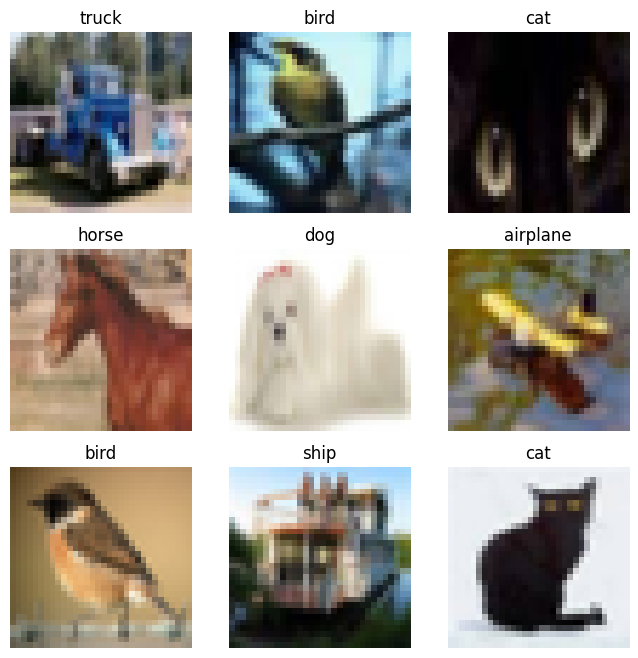

In [2]:
# Download training data from open datasets.
training_data = datasets.CIFAR10(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)
# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

# Visulization
labels_map = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    print(training_data[0][0].size())
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    img = torch.permute(img, (1, 2, 0))  # you may want to permute order of the axes
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

## 1 - Generic Multi-Layer Perceptron Model
#### **(30%) Exercise 1**: Multi-Layer Neural Network Model 
Define a neural network model class from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). The class shold be able to generate any number of layers and layer sizes neural network model. 
- Define the layers of the model in `__init__` function according to the input list: `hidden_layer_size`. 
- **You may want to use a `for` loop** according to the length of `hidden_layer_size` list.

> **Hint:** you may find this [post](https://discuss.pytorch.org/t/append-for-nn-sequential-or-directly-converting-nn-modulelist-to-nn-sequential/7104) very useful and this [tutorial](https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html) inspiring.

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_layer_sizes):
        super().__init__()
        self.flatten = nn.Flatten()
        ### START CODE HERE ###
        modules = []
        input_size = 3*32*32
        
        modules.append(nn.Linear(input_size, hidden_layer_sizes[0]))
        modules.append(nn.ReLU())

        if len(hidden_layer_sizes) >= 2:
            for i in range(len(hidden_layer_sizes) - 1):
                modules.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i+1]))
                modules.append(nn.ReLU())
        
        modules.append(nn.Linear(hidden_layer_sizes[-1], 10))
                
        
        ### END CODE HERE ###
        self.linear_relu_stack = nn.Sequential(*modules)

    def forward(self, inputs):
        x = self.flatten(inputs)
        logits = self.linear_relu_stack(x)
        return logits

# 2-layer Test
model1 = NeuralNetwork([100])
print(model1)
X = torch.rand(1, 3, 32, 32)
logits = model1(X)  # DO NOT call model.forward()
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print("y_pred = ", int(y_pred))
print(f"model 1 predicted classes: {y_pred}: {labels_map[int(y_pred)]}")

# 4-layer Test
model2 = NeuralNetwork([100, 200, 300])
print(model2)
X = torch.rand(1, 3, 32, 32)
logits = model2(X)  # DO NOT call model.forward()
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"model 2 predicted classes: {y_pred}: {labels_map[int(y_pred)]}")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
y_pred =  2
model 1 predicted classes: tensor([2]): bird
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=300, bias=True)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=10, bias=True)
  )
)
model 2 predicted classes: tensor([9]): truck


> **Expected results:**
```console
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
model 1 predicted classes: tensor([6]): frog
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=300, bias=True)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=10, bias=True)
  )
)
model 2 predicted classes: tensor([4]): deer
```


## 2 - Hyperparameter Tuning
Hyperparameters are **NOT** model parameters (weights and biases), but they are important to govern your model's performance. In this section, we are going to experiment following hyperparameters with various settings and to observe their affections on the model prediction accuracy.
- Optimizer
- Batch Size
- Number of Layers
- Layer Sizes
- Learning Rate

#### Training / Test Function
The `train()` and `test()` function is pre-defined, so that you can use them for later experiments.

In [5]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# Define a test function to evaluate model performance
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, accuracy = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            accuracy += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    accuracy /= size
    print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return accuracy

#### **(10%) Exercise 2.1**: Optimizer
Plot learning curves (test accuracy) to illustrate how the **optimizer** affects model's performance. 
- Train at least 5 epochs for each hyperparameter variation.
- Use the following 3 optimizers:
    1. Stochastic Gradient Descent
    2. RMS Propagation
    3. Adam
- **DO NOT** change other hyperparameters.


Epoch 1
-------------------------------
loss: 2.302855  [    0/50000]
Test Error: 
 Accuracy: 9.8%, Avg loss: 2.303015 

Epoch 2
-------------------------------
loss: 2.302492  [    0/50000]
Test Error: 
 Accuracy: 9.8%, Avg loss: 2.302679 

Epoch 3
-------------------------------
loss: 2.302135  [    0/50000]
Test Error: 
 Accuracy: 9.9%, Avg loss: 2.302339 

Epoch 4
-------------------------------
loss: 2.301776  [    0/50000]
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.301994 

Epoch 5
-------------------------------
loss: 2.301409  [    0/50000]
Test Error: 
 Accuracy: 10.1%, Avg loss: 2.301646 

SGD Optimizer Done!
Epoch 1
-------------------------------
loss: 2.301036  [    0/50000]
Test Error: 
 Accuracy: 21.6%, Avg loss: 2.101601 

Epoch 2
-------------------------------
loss: 2.087456  [    0/50000]
Test Error: 
 Accuracy: 24.4%, Avg loss: 2.015374 

Epoch 3
-------------------------------
loss: 1.980114  [    0/50000]
Test Error: 
 Accuracy: 30.6%, Avg loss: 1.929303 

Epoch 4

Text(0.5, 0, 'Epochs')

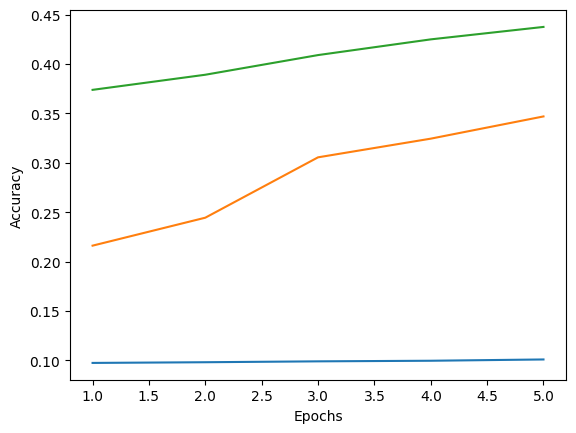

In [6]:
from pickletools import optimize


train_dataloader = DataLoader(training_data, batch_size=1000)
test_dataloader = DataLoader(test_data, batch_size=1000)
loss_fn = nn.CrossEntropyLoss()
learning_curves = []

# SGD
### START CODE HERE ###
model = model2
sgd_optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
epochs = 5
### END CODE HERE ###
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, sgd_optimizer)
    acc = test(test_dataloader, model, loss_fn)
    test_acc.append(acc)
print(f"SGD Optimizer Done!")
learning_curves.append(test_acc)

# RMSProp
### START CODE HERE ###
model = model2
rmsp_optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
epochs = 5
### END CODE HERE ###
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, rmsp_optimizer)
    acc = test(test_dataloader, model, loss_fn)
    test_acc.append(acc)
print(f"RMSProp Optimizer Done!")
learning_curves.append(test_acc)

# Adam
### START CODE HERE ###
model = model2
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5
### END CODE HERE ###
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, adam_optimizer)
    acc = test(test_dataloader, model, loss_fn)
    test_acc.append(acc)
print(f"Adam Optimizer Done!")
learning_curves.append(test_acc)


# Plot
plt.clf()
epoch_ticks = list(range(1, epochs+1))
for i in range(len(learning_curves)):
    plt.plot(epoch_ticks, learning_curves[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


#### **(10%) Exercise 2.2**: Batch Size
Plot learning curves (test accuracy) to illustrate how the **batch size** affects model performance. 
- Train at least 5 epochs for each hyperparameter variation.
- Use at least 4 different batch sizes.
- You can define a list: `batch_sizes` to store all the batch size settings.
- `DataLoader` is reusable


Epoch 1
-------------------------------
loss: 1.646589  [    0/50000]
loss: 1.511622  [10000/50000]
loss: 1.584220  [20000/50000]
loss: 1.512592  [30000/50000]
loss: 1.512011  [40000/50000]
Test Error: 
 Accuracy: 43.7%, Avg loss: 1.573152 

Epoch 2
-------------------------------
loss: 1.610883  [    0/50000]
loss: 1.475281  [10000/50000]
loss: 1.572226  [20000/50000]
loss: 1.480880  [30000/50000]
loss: 1.483526  [40000/50000]
Test Error: 
 Accuracy: 44.3%, Avg loss: 1.554672 

Epoch 3
-------------------------------
loss: 1.604361  [    0/50000]
loss: 1.444674  [10000/50000]
loss: 1.554169  [20000/50000]
loss: 1.454324  [30000/50000]
loss: 1.454995  [40000/50000]
Test Error: 
 Accuracy: 44.8%, Avg loss: 1.537850 

Epoch 4
-------------------------------
loss: 1.588770  [    0/50000]
loss: 1.410046  [10000/50000]
loss: 1.535123  [20000/50000]
loss: 1.431390  [30000/50000]
loss: 1.437546  [40000/50000]
Test Error: 
 Accuracy: 45.5%, Avg loss: 1.521766 

Epoch 5
------------------------

Text(0.5, 0, 'Epochs')

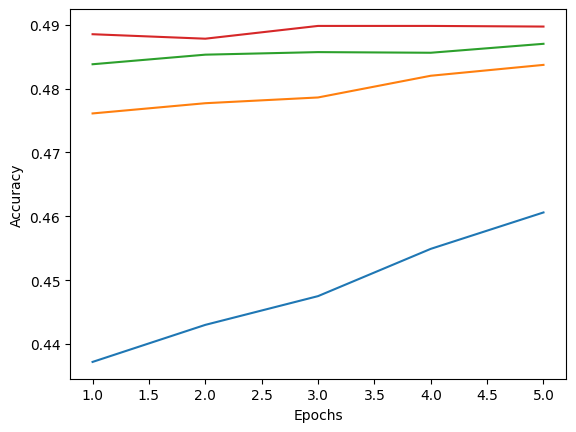

In [7]:
loss_fn = nn.CrossEntropyLoss()
learning_curves = []

### START CODE HERE ###
batch_sizes = [100, 500, 1000, 2000]  
epochs = 5
for bs in batch_sizes:
    train_dataloader = DataLoader(training_data, bs)
    test_dataloader = DataLoader(test_data, bs)
    model = model2
### END CODE HERE ###
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    test_acc = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        acc = test(test_dataloader, model, loss_fn)
        test_acc.append(acc)
    print(f"Batch size: {bs} Done!")
    learning_curves.append(test_acc)


# Plot
plt.clf()
epoch_ticks = list(range(1, epochs+1))
for i in range(len(learning_curves)):
    plt.plot(epoch_ticks, learning_curves[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')



#### **(10%) Exercise 2.3**: Number of Layers 
Plot learning curves (test accuracy) to illustrate how **number of layers** affects model performance. 
- Train at least 5 epochs for each hyperparameter variation.
- Use at least 4 different settings.
- You can use a list: `layer_sizes` to store all the settings.
- Use same size for each layer.


Epoch 1
-------------------------------
loss: 1.343710  [    0/50000]
Test Error: 
 Accuracy: 49.1%, Avg loss: 1.436895 

Epoch 2
-------------------------------
loss: 1.336054  [    0/50000]
Test Error: 
 Accuracy: 49.1%, Avg loss: 1.438105 

Epoch 3
-------------------------------
loss: 1.338052  [    0/50000]
Test Error: 
 Accuracy: 49.2%, Avg loss: 1.436180 

Epoch 4
-------------------------------
loss: 1.335533  [    0/50000]
Test Error: 
 Accuracy: 49.3%, Avg loss: 1.434054 

Epoch 5
-------------------------------
loss: 1.332351  [    0/50000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.432527 

Layer size: 2 Done!
Epoch 1
-------------------------------
loss: 1.329767  [    0/50000]
Test Error: 
 Accuracy: 49.3%, Avg loss: 1.433290 

Epoch 2
-------------------------------
loss: 1.323083  [    0/50000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.431361 

Epoch 3
-------------------------------
loss: 1.320733  [    0/50000]
Test Error: 
 Accuracy: 49.6%, Avg loss: 1.429697 

Epoc

Text(0.5, 0, 'Epochs')

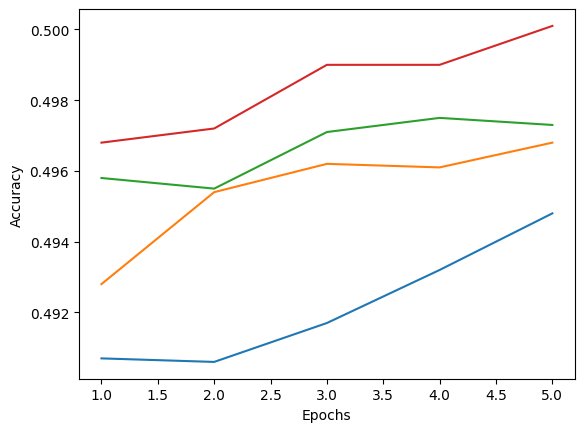

In [8]:
train_dataloader = DataLoader(training_data, batch_size=1000)
test_dataloader = DataLoader(test_data, batch_size=1000)
loss_fn = nn.CrossEntropyLoss()
learning_curves = []

### START CODE HERE ###
layer_sizes = [2, 3, 4, 5]
epochs = 5
for ls in layer_sizes:
    model = model2
### END CODE HERE ###
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    test_acc = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        acc = test(test_dataloader, model, loss_fn)
        test_acc.append(acc)
    print(f"Layer size: {ls} Done!")
    learning_curves.append(test_acc)


# Plot
plt.clf()
epoch_ticks = list(range(1, epochs+1))
for i in range(len(learning_curves)):
    plt.plot(epoch_ticks, learning_curves[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


#### **(10%) Exercise 2.4**: Layer Size 
Plot learning curves (test accuracy) to illustrate how the **layer sizes** affects model performance. 
- Train at least 5 epochs for each hyperparameter variation.
- Use at least 4 different settings.
- You can use a list: `layer_sizes` to store all the settings.
- Do not change number of layers.
- If using 2 or more hidden layers, you can choose different size for each layer.


Epoch 1
-------------------------------
loss: 1.286709  [    0/50000]
Test Error: 
 Accuracy: 49.8%, Avg loss: 1.418922 

Epoch 2
-------------------------------
loss: 1.280256  [    0/50000]
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.416740 

Epoch 3
-------------------------------
loss: 1.278811  [    0/50000]
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.414898 

Epoch 4
-------------------------------
loss: 1.277207  [    0/50000]
Test Error: 
 Accuracy: 50.1%, Avg loss: 1.413160 

Epoch 5
-------------------------------
loss: 1.275646  [    0/50000]
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.412125 

Layer size: 1 Done!
Epoch 1
-------------------------------
loss: 1.274339  [    0/50000]
Test Error: 
 Accuracy: 50.0%, Avg loss: 1.415442 

Epoch 2
-------------------------------
loss: 1.268379  [    0/50000]
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.412986 

Epoch 3
-------------------------------
loss: 1.266811  [    0/50000]
Test Error: 
 Accuracy: 50.3%, Avg loss: 1.410919 

Epoc

Text(0.5, 0, 'Epochs')

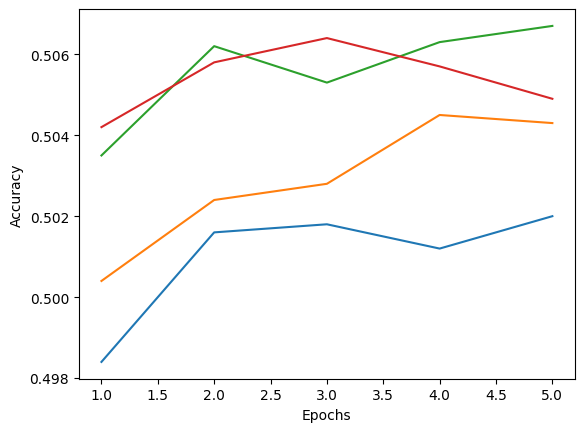

In [10]:
train_dataloader = DataLoader(training_data, batch_size=1000)
test_dataloader = DataLoader(test_data, batch_size=1000)
loss_fn = nn.CrossEntropyLoss()
learning_curves = []

### START CODE HERE ###
layer_sizes = [1, 2, 3, 4]
epochs = 5
for ls in layer_sizes:
    model = model2
### END CODE HERE ###
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    test_acc = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        acc = test(test_dataloader, model, loss_fn)
        test_acc.append(acc)
    print(f"Layer size: {ls} Done!")
    learning_curves.append(test_acc)


# Plot
plt.clf()
epoch_ticks = list(range(1, epochs+1))
for i in range(len(learning_curves)):
    plt.plot(epoch_ticks, learning_curves[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


#### **(10%) Exercise 2.5**: Learning Rate 
Plot learning curves (test accuracy) to illustrate how the **learning rate** affects model performance. 
- Train at least 5 epochs for each hyperparameter variation.
- Use at least 4 different learning rates.
- You can use a list: `learning_rates` to store all the settings.

Epoch 1
-------------------------------
loss: 1.242269  [    0/50000]
Test Error: 
 Accuracy: 49.9%, Avg loss: 1.413596 

Epoch 2
-------------------------------
loss: 1.252861  [    0/50000]
Test Error: 
 Accuracy: 50.5%, Avg loss: 1.406090 

Epoch 3
-------------------------------
loss: 1.239949  [    0/50000]
Test Error: 
 Accuracy: 50.4%, Avg loss: 1.406951 

Epoch 4
-------------------------------
loss: 1.244003  [    0/50000]
Test Error: 
 Accuracy: 50.3%, Avg loss: 1.408713 

Epoch 5
-------------------------------
loss: 1.247666  [    0/50000]
Test Error: 
 Accuracy: 50.4%, Avg loss: 1.403837 

Learning Rate: 0.001 Done!
Epoch 1
-------------------------------
loss: 1.240173  [    0/50000]
Test Error: 
 Accuracy: 25.7%, Avg loss: 2.003348 

Epoch 2
-------------------------------
loss: 1.974681  [    0/50000]
Test Error: 
 Accuracy: 27.3%, Avg loss: 1.931181 

Epoch 3
-------------------------------
loss: 1.906909  [    0/50000]
Test Error: 
 Accuracy: 28.0%, Avg loss: 1.902760

Text(0.5, 0, 'Epochs')

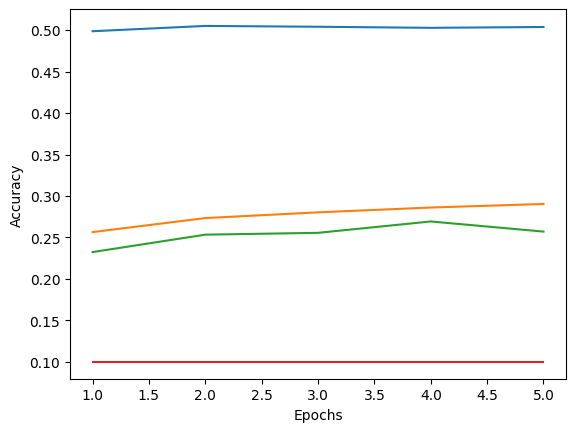

In [11]:
train_dataloader = DataLoader(training_data, batch_size=1000)
test_dataloader = DataLoader(test_data, batch_size=1000)
loss_fn = nn.CrossEntropyLoss()
learning_curves = []

### START CODE HERE ###
learning_rates = [0.001, 0.005, 0.01, 00.5]
epochs = 5
for lr in learning_rates:
    model = model2
### END CODE HERE ###
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    test_acc = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        acc = test(test_dataloader, model, loss_fn)
        test_acc.append(acc)
    print(f"Learning Rate: {lr} Done!")
    learning_curves.append(test_acc)


# Plot
plt.clf()
epoch_ticks = list(range(1, epochs+1))
for i in range(len(learning_curves)):
    plt.plot(epoch_ticks, learning_curves[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


## 3 - Best Performed Model
#### **(20%) Exercise 3**: Final Tunings
Demonstrate the best performed model using appropriate hyperparameters. 

> Hint 1: simply combine the previously found best hyperparameters will not guanrantee the best performed model.

> Hint 2: Increase `epochs` may also be helpful.


Epoch 1
-------------------------------
loss: 2.306822  [    0/50000]
loss: 1.927709  [10000/50000]
loss: 1.857171  [20000/50000]
loss: 1.772294  [30000/50000]
loss: 1.611232  [40000/50000]
Test Error: 
 Accuracy: 39.6%, Avg loss: 1.684229 

Epoch 2
-------------------------------
loss: 1.726743  [    0/50000]
loss: 1.578218  [10000/50000]
loss: 1.674055  [20000/50000]
loss: 1.558931  [30000/50000]
loss: 1.527206  [40000/50000]
Test Error: 
 Accuracy: 44.0%, Avg loss: 1.581684 

Epoch 3
-------------------------------
loss: 1.609489  [    0/50000]
loss: 1.408661  [10000/50000]
loss: 1.554164  [20000/50000]
loss: 1.501251  [30000/50000]
loss: 1.355591  [40000/50000]
Test Error: 
 Accuracy: 45.1%, Avg loss: 1.540349 

Epoch 4
-------------------------------
loss: 1.599122  [    0/50000]
loss: 1.361778  [10000/50000]
loss: 1.547442  [20000/50000]
loss: 1.444373  [30000/50000]
loss: 1.346726  [40000/50000]
Test Error: 
 Accuracy: 47.3%, Avg loss: 1.498155 

Epoch 5
------------------------

Text(0.5, 0, 'Epochs')

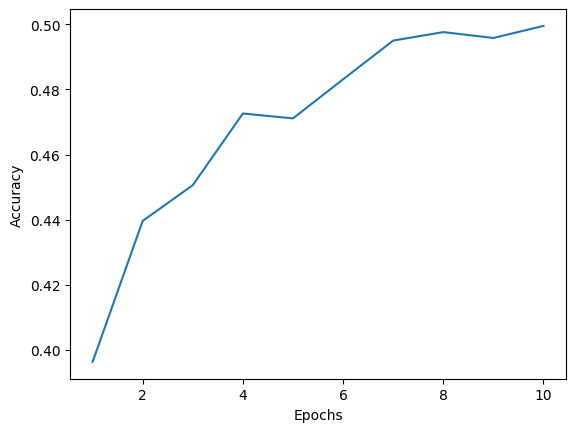

In [13]:
### START CODE HERE ###
model = NeuralNetwork([300, 500])
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_dataloader = DataLoader(training_data, batch_size=100)
test_dataloader = DataLoader(test_data, batch_size=100)
epochs = 10
### END CODE HERE ###

learning_curves = []
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    acc = test(test_dataloader, model, loss_fn)
    test_acc.append(acc)
print(f"Optimize Done!")
# learning_curves.append(test_acc)


# Plot
plt.clf()
epoch_ticks = list(range(1, epochs+1))
plt.plot(epoch_ticks, test_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


## Congrats on finishing this assignment! 